# Evictions Data 

This notebook analyses Evictions data from NYC Open Data, specifically looking at the spatial prevalence of evictions and possible related factors. 


In [62]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon
from datetime import datetime

Loading data from the file

In [5]:
#loaded evictions csv data 
evictions = pd.read_csv('Evictions.csv')

# 1. Describe the data, its structure, data types, formats etc

In [6]:
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,75924/17,15444,163-43 PHROANE AVENUE,2,09/04/2018,Edward,Guida,Residential,QUEENS,11433,Not an Ejectment,Possession,40.690359,-73.786320,12.0,27.0,264.0,4217170.0,4.102020e+09,South Jamaica
1,54870/17,74389,25 EAST 193RD STREET,W21,04/05/2018,Justin,Grossman,Residential,BRONX,10468,Not an Ejectment,Possession,40.866452,-73.897349,7.0,14.0,401.0,2014146.0,2.031910e+09,Bedford Park-Fordham North
2,K54648/17,77852,1779 74TH STREET,"ONE ROOM, FIRST ROOM",04/25/2017,Ileana,Rivera,Residential,BROOKLYN,11204,Not an Ejectment,Possession,40.614423,-73.996060,11.0,43.0,264.0,3159059.0,3.062040e+09,Bensonhurst West
3,18327/19,355590,901 IRVINE STREET,"1,",09/16/2019,Thomas,Bia,Residential,BRONX,10474,Not an Ejectment,Possession,40.819644,-73.888790,2.0,17.0,11502.0,2006357.0,2.027610e+09,Hunts Point
4,38744/17,168490,100 BELLAMY LOOP,5A,02/22/2018,Alfred,Locascio,Residential,BRONX,10475,Not an Ejectment,Possession,40.872610,-73.825656,10.0,12.0,46201.0,2095398.0,2.051410e+09,Co-op City


In [7]:
#printed Columns in the evictions data 
print('Evictions data columns:',evictions.columns)

Evictions data columns: Index(['Court Index Number', 'Docket Number ', 'Eviction Address',
       'Eviction Apartment Number', 'Executed Date', 'Marshal First Name',
       'Marshal Last Name', 'Residential/Commercial', 'BOROUGH',
       'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')


In [8]:
evictions.shape

(66402, 20)

In [164]:
#data types 
evictions.dtypes

Court Index Number                   object
Docket Number                         int64
Eviction Address                     object
Eviction Apartment Number            object
Executed Date                datetime64[ns]
Marshal First Name                   object
Marshal Last Name                    object
Residential/Commercial               object
BOROUGH                              object
Eviction Postcode                     int64
Ejectment                            object
Eviction/Legal Possession            object
Latitude                            float64
Longitude                           float64
Community Board                     float64
Council District                    float64
Census Tract                        float64
BIN                                 float64
BBL                                 float64
NTA                                  object
YEAR                                  int64
geometry                           geometry
dtype: object

The cell above displays all the data types, which shows that the dataset has a variety of information for each evictions. The length of the evictions file is also displayed. More information is found within the actual columns of the data. 

# 2. Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions?


In [9]:
evictions['Executed Date']

0        09/04/2018
1        04/05/2018
2        04/25/2017
3        09/16/2019
4        02/22/2018
            ...    
66397    12/03/2019
66398    06/25/2018
66399    08/22/2019
66400    11/13/2020
66401    04/05/2018
Name: Executed Date, Length: 66402, dtype: object

Executed Date column was originally in object type, and so needed to be converted to the datetime format

In [10]:
evictions['Executed Date'] = pd.to_datetime(evictions['Executed Date'], format="%m/%d/%Y")

In [11]:
#data types 
evictions.dtypes

Court Index Number                   object
Docket Number                         int64
Eviction Address                     object
Eviction Apartment Number            object
Executed Date                datetime64[ns]
Marshal First Name                   object
Marshal Last Name                    object
Residential/Commercial               object
BOROUGH                              object
Eviction Postcode                     int64
Ejectment                            object
Eviction/Legal Possession            object
Latitude                            float64
Longitude                           float64
Community Board                     float64
Council District                    float64
Census Tract                        float64
BIN                                 float64
BBL                                 float64
NTA                                  object
dtype: object

The following shows the breakdown of eviction trends by year

In [12]:
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,75924/17,15444,163-43 PHROANE AVENUE,2,2018-09-04,Edward,Guida,Residential,QUEENS,11433,Not an Ejectment,Possession,40.690359,-73.786320,12.0,27.0,264.0,4217170.0,4.102020e+09,South Jamaica
1,54870/17,74389,25 EAST 193RD STREET,W21,2018-04-05,Justin,Grossman,Residential,BRONX,10468,Not an Ejectment,Possession,40.866452,-73.897349,7.0,14.0,401.0,2014146.0,2.031910e+09,Bedford Park-Fordham North
2,K54648/17,77852,1779 74TH STREET,"ONE ROOM, FIRST ROOM",2017-04-25,Ileana,Rivera,Residential,BROOKLYN,11204,Not an Ejectment,Possession,40.614423,-73.996060,11.0,43.0,264.0,3159059.0,3.062040e+09,Bensonhurst West
3,18327/19,355590,901 IRVINE STREET,"1,",2019-09-16,Thomas,Bia,Residential,BRONX,10474,Not an Ejectment,Possession,40.819644,-73.888790,2.0,17.0,11502.0,2006357.0,2.027610e+09,Hunts Point
4,38744/17,168490,100 BELLAMY LOOP,5A,2018-02-22,Alfred,Locascio,Residential,BRONX,10475,Not an Ejectment,Possession,40.872610,-73.825656,10.0,12.0,46201.0,2095398.0,2.051410e+09,Co-op City


Created copy of data and sorted data by year

In [13]:
evictions2 = evictions

In [14]:
evictions2.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,75924/17,15444,163-43 PHROANE AVENUE,2,2018-09-04,Edward,Guida,Residential,QUEENS,11433,Not an Ejectment,Possession,40.690359,-73.786320,12.0,27.0,264.0,4217170.0,4.102020e+09,South Jamaica
1,54870/17,74389,25 EAST 193RD STREET,W21,2018-04-05,Justin,Grossman,Residential,BRONX,10468,Not an Ejectment,Possession,40.866452,-73.897349,7.0,14.0,401.0,2014146.0,2.031910e+09,Bedford Park-Fordham North
2,K54648/17,77852,1779 74TH STREET,"ONE ROOM, FIRST ROOM",2017-04-25,Ileana,Rivera,Residential,BROOKLYN,11204,Not an Ejectment,Possession,40.614423,-73.996060,11.0,43.0,264.0,3159059.0,3.062040e+09,Bensonhurst West
3,18327/19,355590,901 IRVINE STREET,"1,",2019-09-16,Thomas,Bia,Residential,BRONX,10474,Not an Ejectment,Possession,40.819644,-73.888790,2.0,17.0,11502.0,2006357.0,2.027610e+09,Hunts Point
4,38744/17,168490,100 BELLAMY LOOP,5A,2018-02-22,Alfred,Locascio,Residential,BRONX,10475,Not an Ejectment,Possession,40.872610,-73.825656,10.0,12.0,46201.0,2095398.0,2.051410e+09,Co-op City


In [15]:
evictions2['Executed Date'].max()

Timestamp('2070-03-29 00:00:00')

In [16]:
evictions2['Executed Date'].min()

Timestamp('2017-01-03 00:00:00')

In [17]:
evictions2.sort_values(by='Executed Date', ascending=True).tail(5)


,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
39365,55269/20,13639,66-31 OTTO ROAD,NaN,2021-01-12,Robert,Renzulli,Commercial,QUEENS,11385,Not an Ejectment,Possession,40.705458,-73.889294,5.0,30.0,61301.0,4089237.0,4.036671e+09,Ridgewood
42969,65405/19,12421,442A EAST 14TH STREET - THE STREET LEVEL STORE...,NaN,2021-02-04,Robert,Renzulli,Commercial,MANHATTAN,10009,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5000,79035/19,106064,2253 STRAUSS STRE ET A/K/A 47 NEWPORT STREET,STOREFRONT,2021-02-09,Justin,Grossman,Commercial,BROOKLYN,11212,Not an Ejectment,Possession,40.658878,-73.913787,16.0,42.0,896.0,3082249.0,3.035970e+09,Brownsville
56150,63780/19,208836,118-05 LIBERTY AVENUE FIRST FLOOR STORE BASEME...,NaN,2021-03-02,Richard,Capuano,Commercial,QUEENS,11419,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21281,28748/16,317112,2714 BAINBRIDGE AVENUE,4A,2070-03-29,John,Villanueva,Residential,BRONX,10458,Not an Ejectment,Possession,40.865991,-73.890958,7.0,15.0,40502.0,2016625.0,2.032870e+09,Bedford Park-Fordham North


Creating new column titled "YEAR" which displays year of eviction execution (from Executed Date column) 

In [18]:
evictions2['YEAR'] = evictions2["Executed Date"].dt.year

In [19]:
evictions2.tail()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,YEAR
66397,29267/19,97582,835 HOME STREET,3-A,2019-12-03,Justin,Grossman,Residential,BRONX,10459,...,Possession,40.827824,-73.898764,3.0,17.0,135.0,2005053.0,2.026810e+09,Morrisania-Melrose,2019
66398,61096/18,8478,1165 BROADWAY - ROOM 305,NaN,2018-06-25,Robert,Renzulli,Commercial,MANHATTAN,10001,...,Possession,40.744719,-73.989062,5.0,3.0,58.0,1015683.0,1.008290e+09,Hudson Yards-Chelsea-Flatiron-Union Square,2018
66399,56203/19,23862,100-41 196 STREET,NaN,2019-08-22,Edward,Guida,Residential,QUEENS,11423,...,Possession,40.709417,-73.762900,12.0,27.0,50201.0,4430409.0,4.108630e+09,Hollis,2019
66400,76113/19,13088,67-75 METROPOLITAN AVENUE,NaN,2020-11-13,Robert,Renzulli,Commercial,BROOKLYN,11249,...,Possession,40.717220,-73.964179,1.0,33.0,555.0,3062394.0,3.023570e+09,North Side-South Side,2020
66401,73011/17,15478,59-41 56TH DRIVE,2,2018-04-05,Edward,Guida,Residential,QUEENS,11378,...,Possession,40.723907,-73.907234,5.0,30.0,531.0,4059998.0,4.026900e+09,Maspeth,2018


New dataframe created for evictions in the year of 2017 

In [20]:
evictions2017 = evictions2[evictions2['YEAR']== 2017]

In [21]:
evictions2017.tail()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,YEAR
66381,K053034/17,379757,94 ROEBLING STREET,2,2017-05-22,Richard,McCoy,Residential,BROOKLYN,11211,...,Possession,40.716048,-73.955421,1.0,33.0,519.0,3062120.0,3.023290e+09,North Side-South Side,2017
66386,101730/16,60322,695 VAN SICLEN AVENU E,2 (LEFT REAR BEDROOM,2017-04-12,Justin,Grossman,Residential,BROOKLYN,11207,...,Possession,40.662662,-73.887282,5.0,42.0,1122.0,3096825.0,3.043050e+09,East New York (Pennsylvania Ave),2017
66390,B79846/16,151748,120-16 178TH PLACE,NaN,2017-06-15,Ronald,Pazant,Residential,QUEENS,11434,...,Possession,40.684886,-73.765017,12.0,27.0,368.0,4269449.0,4.124730e+09,St. Albans,2017
66392,251506/17,6406,201 EAST 116TH STREET A/K/A 2125 THIRD AVENUE,3,2017-10-20,Robert,Renzulli,Residential,MANHATTAN,10035,...,Possession,40.797812,-73.939680,11.0,8.0,188.0,1052565.0,1.016660e+09,East Harlem North,2017
66396,74324/16,200075,559 54TH STREET,NaN,2017-01-18,Richard,Capuano,Residential,BROOKLYN,11220,...,Possession,40.642122,-74.011397,7.0,38.0,100.0,3014322.0,3.008160e+09,Sunset Park East,2017


New dataframes for evictions in each year, from 2017 to 2021 (as seen using min and max functions). Shape is taken of each dataframe to show number of rows in each year, which corresponds to the number of evictions in each year

In [22]:
evictions2018 = evictions2[evictions2['YEAR']== 2018]
evictions2019 = evictions2[evictions2['YEAR']== 2019]
evictions2020 = evictions2[evictions2['YEAR']== 2020]
evictions2021 = evictions2[evictions2['YEAR']== 2021]

In [23]:
evictions2017.shape, evictions2018.shape, evictions2019.shape, evictions2020.shape, evictions2021.shape


((22530, 21), (21830, 21), (18647, 21), (3387, 21), (7, 21))

As shown above, the number of evictions decreases every year, and quite significantly after 2019. In this data, the year 2017 had the highest number of evictions, and 2021 had the lowest. There was a NY state ban on evictions that began at the start of the pandemic (March 2020), which definitely contributed to the lower rate of evictions in 2020, and now in 2021 as the ban has continued. The overall decreasing trend over five years could also be attributed to  tenant's rights movements and protections for renters. 

# 3. What is the ratio of commercial to residential evictions in the entire data? Was this ratio constant over time (calculate it separately for each year in the data)? Visualize the data for each year and discuss the trends you found.


In [24]:
#calculated number of residential vs commercial evictions in the data 
evictions2['Residential/Commercial'].value_counts()

Residential    60809
Commercial      5593
Name: Residential/Commercial, dtype: int64

In [130]:
totalratio = 60809/5593

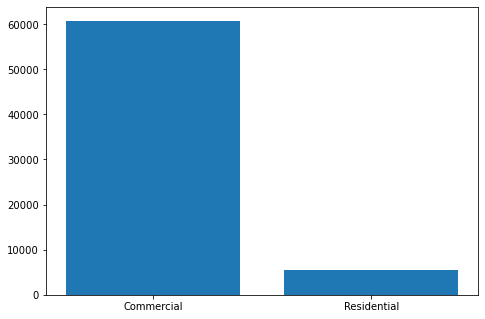

In [26]:
#plotted figure of calculation
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ['Commercial', 'Residential']
Evictions = evictions2['Residential/Commercial'].value_counts()
ax.bar(years,Evictions)
plt.show()

In [27]:
evictions2017['Residential/Commercial'].value_counts()

Residential    20810
Commercial      1720
Name: Residential/Commercial, dtype: int64

In [35]:
ratio2017 = 20810/1720

In [32]:
evictions2018['Residential/Commercial'].value_counts()

Residential    19988
Commercial      1842
Name: Residential/Commercial, dtype: int64

In [30]:
ratio2018 = 19988/1842, 
print(ratio2018)

(10.851248642779588,)


In [31]:
evictions2019['Residential/Commercial'].value_counts()

Residential    16975
Commercial      1672
Name: Residential/Commercial, dtype: int64

In [99]:
ratio2019=16975/1672, 
print(ratio2019)

(10.152511961722489,)


In [71]:
evictions2020['Residential/Commercial'].value_counts()

Residential    3035
Commercial      352
Name: Residential/Commercial, dtype: int64

In [100]:
ratio2020 = 3035/352, 
print(ratio2020)

(8.622159090909092,)


In [72]:
evictions2021['Residential/Commercial'].value_counts()
#no residential evictions in 2021 

Commercial    7
Name: Residential/Commercial, dtype: int64

In [34]:
ratio2021 = 0/7

In [155]:
#printed residential to commercial ratio for each year
print('2017 ratio is:', ratio2017),
print('2018 ratio is:', ratio2018),
print('2019 ratio is:', ratio2019),
print('2020 ratio is:', ratio2020),
print('2021 ratio is:', ratio2021)

2017 ratio is: (12.098837209302326, None)
2018 ratio is: (10.851248642779588,)
2019 ratio is: (10.152511961722489,)
2020 ratio is: (8.622159090909092,)
2021 ratio is: (0.0, None)


Text(0, 0.5, 'Number of Evictions')

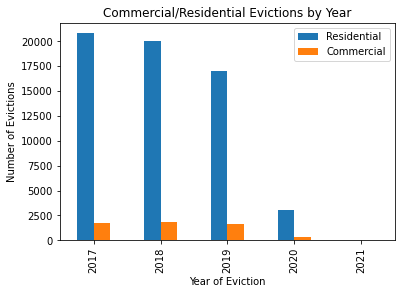

In [161]:
#plot residential vs commercial data for each year 
plotdata = pd.DataFrame((evictions2017['Residential/Commercial'].value_counts(),
                         evictions2018['Residential/Commercial'].value_counts(),
                         evictions2019['Residential/Commercial'].value_counts(),
                         evictions2020['Residential/Commercial'].value_counts(),
                         evictions2021['Residential/Commercial'].value_counts()
                         
                        )
    , 
    index=["2017", "2018","2019","2020","2021"]
)
plotdata.plot(kind="bar",legend=True)
plt.title("Commercial/Residential Evictions by Year")
plt.xlabel("Year of Eviction")
plt.ylabel("Number of Evictions")

The ratio of residential to commercial evictions in the entire data was 10.87, this ratio changed throughout the five years. There are always signifiantly more residential evictions as compared to commercial evictions, but in 2021 there have been no residential evictions and just 7 commercial evictions. As the ratio is steadily decreasing, this means that less residential evictions are occurring (possibly as a result of the ban) rather than more commercial evictions.

In the bar graph above, we can see that the number of commerical evictions between 2017 and 2019 have remtained at roughly the same level, whereas residential evictions have continuously dropped. 

**4. What are the full names of the top 5 eviction marshals (those who conducted the largest number of evictions over time)?**



In [36]:
evictions['Marshal Last Name'].unique

<bound method Series.unique of 0           Guida
1        Grossman
2          Rivera
3             Bia
4        Locascio
           ...   
66397    Grossman
66398    Renzulli
66399       Guida
66400    Renzulli
66401       Guida
Name: Marshal Last Name, Length: 66402, dtype: object>

In [37]:
evictions['Marshal Last Name'].value_counts()

Grossman       9173
Daley          6487
Rivera         5842
Bia            5560
Guida          5422
Weinheim       5350
McCoy          4023
Barone         3730
Essock, Jr.    2661
Renzulli       2403
Capuano        1870
Chevlowe       1870
Rose           1702
Locascio       1425
Essock         1417
Pazant         1337
Villanueva      822
Barbarovich     804
Giachetta       771
Powell          757
Schain          713
Siracusa        551
Blake           446
Marchisotto     394
Giglio          388
Kemp            366
Solimine        118
Name: Marshal Last Name, dtype: int64

In [159]:
evictions['Marshal First Name'].value_counts()

Justin        9173
Henry         6487
Richard       5893
Ileana        5842
Thomas        5560
Edward        5422
Danny         5350
George        4078
Darlene       3730
Robert        2521
Maxine        1870
Gary          1557
Alfred        1425
Ronald        1337
John           822
Vadim          804
Kenneth        771
Steven         757
Howard         713
Frank          551
Bernard        446
Charles        394
Salavatore     388
Bruce          366
Jeffrey        145
Name: Marshal First Name, dtype: int64

The top 5 eviction marshal names are as follows: 

1. Justin Grossman (9173 evictions) 
2. Henry Daley (6487 evictions) 
3. Richard Rivera (5893 evictions) 
4. Ileana Bia (5842 evictions) 
5. Thomas Guida (5560 evictions) 


**5. How do 5 boroughs compare overtime in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts.**


In [38]:
#used value count to find number of evictions per borough per year
[evictions2017['BOROUGH'].value_counts(),
evictions2018['BOROUGH'].value_counts(),
evictions2019['BOROUGH'].value_counts(),
evictions2020['BOROUGH'].value_counts(),
evictions2021['BOROUGH'].value_counts()]

[BRONX            7662
 BROOKLYN         6357
 QUEENS           4325
 MANHATTAN        3452
 STATEN ISLAND     734
 Name: BOROUGH, dtype: int64,
 BRONX            7140
 BROOKLYN         6157
 QUEENS           4452
 MANHATTAN        3390
 STATEN ISLAND     691
 Name: BOROUGH, dtype: int64,
 BRONX            6188
 BROOKLYN         5312
 QUEENS           3705
 MANHATTAN        2806
 STATEN ISLAND     636
 Name: BOROUGH, dtype: int64,
 BRONX            1061
 BROOKLYN         1003
 QUEENS            693
 MANHATTAN         518
 STATEN ISLAND     112
 Name: BOROUGH, dtype: int64,
 BROOKLYN     3
 QUEENS       2
 BRONX        1
 MANHATTAN    1
 Name: BOROUGH, dtype: int64]

Text(0, 0.5, 'Number of Evictions')

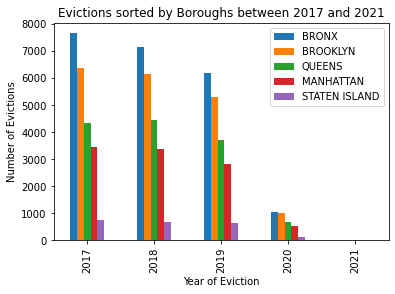

In [39]:
#plot the above information into a bar chart 
plotdata = pd.DataFrame((evictions2017['BOROUGH'].value_counts(),
                         evictions2018['BOROUGH'].value_counts(),
                         evictions2019['BOROUGH'].value_counts(),
                         evictions2020['BOROUGH'].value_counts(),
                         evictions2021['BOROUGH'].value_counts()
                         
                        )
    , 
    index=["2017", "2018","2019","2020","2021"]
)
plotdata.plot(kind="bar",legend=True)
plt.title("Evictions sorted by Boroughs between 2017 and 2021")
plt.xlabel("Year of Eviction")
plt.ylabel("Number of Evictions")

Population counts by borough (based on from 2019 estimates)  

Bronx: 1,418,207	
Brooklyn: 2,559,903	
Queens: 2,253,858	
Manhattan: 1,628,706	
Staten Island: 476,143


In the population counts data, Brooklyn and Queens are the most populous boroughs and have similarly sized populations at about 2.5 and 2.2 million people respectively. Manhattan follows with a similar population to the Bronx, and Staten Island has the lowest population at close to half a million people. 

However, in the evictions data sorted by borough, the Bronx consistenyly has the highest evictions out of all of the boroughs. This disproportionate number of evictions is concerning considering Brooklyn has 1 million more people compared to the Bronx. After the Bronx, the highest evictions are in Brooklyn, Queens, Manhattan and Staten Island, which is close to the order of highest population. All boroughs have decreasing number of evictions, with Staten Island's eviction numbers being quite consistent between 2017 and 2019. Every borough except SI had an eviction in 2021.  

**6. Visualize the data as a choropleth map using NTA level, when the different shades represent the number of evictions in a particular NTA. Discuss your findings.**


In [69]:
#counted number of evictions per NTA 
evictions2['NTA'].value_counts()

East New York                                 1363
Crown Heights North                           1303
East Concourse-Concourse Village              1227
Central Harlem North-Polo Grounds             1195
Williamsbridge-Olinville                      1186
                                              ... 
Arden Heights                                   25
Rossville-Woodrow                               18
Annadale-Huguenot-Prince's Bay-Eltingville      17
park-cemetery-etc-Queens                         7
park-cemetery-etc-Brooklyn                       6
Name: NTA, Length: 191, dtype: int64

In [41]:
#transform data into geo data frame: 
gdfevictions = gpd.GeoDataFrame(
    evictions, geometry=gpd.points_from_xy(evictions.Longitude, evictions.Latitude))

gdfevictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,YEAR,geometry
0,75924/17,15444,163-43 PHROANE AVENUE,2,2018-09-04,Edward,Guida,Residential,QUEENS,11433,...,40.690359,-73.786320,12.0,27.0,264.0,4217170.0,4.102020e+09,South Jamaica,2018,POINT (-73.78632 40.69036)
1,54870/17,74389,25 EAST 193RD STREET,W21,2018-04-05,Justin,Grossman,Residential,BRONX,10468,...,40.866452,-73.897349,7.0,14.0,401.0,2014146.0,2.031910e+09,Bedford Park-Fordham North,2018,POINT (-73.89735 40.86645)
2,K54648/17,77852,1779 74TH STREET,"ONE ROOM, FIRST ROOM",2017-04-25,Ileana,Rivera,Residential,BROOKLYN,11204,...,40.614423,-73.996060,11.0,43.0,264.0,3159059.0,3.062040e+09,Bensonhurst West,2017,POINT (-73.99606 40.61442)
3,18327/19,355590,901 IRVINE STREET,"1,",2019-09-16,Thomas,Bia,Residential,BRONX,10474,...,40.819644,-73.888790,2.0,17.0,11502.0,2006357.0,2.027610e+09,Hunts Point,2019,POINT (-73.88879 40.81964)
4,38744/17,168490,100 BELLAMY LOOP,5A,2018-02-22,Alfred,Locascio,Residential,BRONX,10475,...,40.872610,-73.825656,10.0,12.0,46201.0,2095398.0,2.051410e+09,Co-op City,2018,POINT (-73.82566 40.87261)


In [93]:
#downloaded NTA shapefile from NYC Open Data
nta_map = gpd.read_file("nynta_21a 3")

In [94]:
nta_map.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16..."


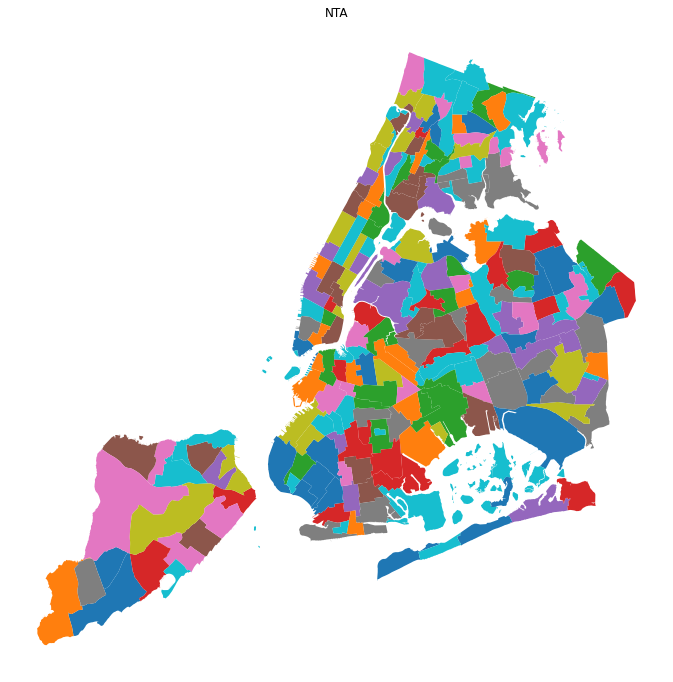

In [95]:
#displaying unique NTA names 
nta_map.plot(column='NTAName',figsize=(12, 12))
plt.axis('off')
plt.title('NTA')
plt.show()

In [104]:
nta_map.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16..."


In [106]:
#changed column name to match column in evictions file
nta_map['NTA'] = nta_map['NTAName']
nta_map

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,NTA
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",Borough Park
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ...",Murray Hill
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ...",East Elmhurst
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ...",Hollis
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16...",Homecrest
...,...,...,...,...,...,...,...,...,...
190,3,Brooklyn,047,BK93,Starrett City,17414.782263,1.159895e+07,"MULTIPOLYGON (((1015251.087 174914.561, 101524...",Starrett City
191,3,Brooklyn,047,BK73,North Side-South Side,28149.966570,2.887016e+07,"POLYGON ((995851.916 203199.332, 995969.192 20...",North Side-South Side
192,3,Brooklyn,047,BK90,East Williamsburg,49247.014740,3.913241e+07,"POLYGON ((1005302.497 199455.730, 1005307.792 ...",East Williamsburg
193,1,Manhattan,061,MN21,Gramercy,12096.891069,7.526916e+06,"POLYGON ((990196.892 207745.371, 990187.613 20...",Gramercy


In [114]:
#extracted only the value count data (evictions per NTA)
evictions3 = evictions2['NTA'].value_counts()
evictions3.columns = ['NTA','evictions']

In [115]:
evictions3

,NTA,evictions
0,East New York,1363
1,Crown Heights North,1303
2,East Concourse-Concourse Village,1227
3,Central Harlem North-Polo Grounds,1195
4,Williamsbridge-Olinville,1186
...,...,...
186,Arden Heights,25
187,Rossville-Woodrow,18
188,Annadale-Huguenot-Prince's Bay-Eltingville,17
189,park-cemetery-etc-Queens,7


In [116]:
#merged and displayed evictions/NTA data
nta_map = nta_map.merge(evictions3, on='NTA')

In [117]:
nta_map

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,NTA,evictions
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",Borough Park,181
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ...",Murray Hill,177
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ...",East Elmhurst,96
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ...",Hollis,218
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16...",Homecrest,162
...,...,...,...,...,...,...,...,...,...,...
186,3,Brooklyn,047,BK93,Starrett City,17414.782263,1.159895e+07,"MULTIPOLYGON (((1015251.087 174914.561, 101524...",Starrett City,165
187,3,Brooklyn,047,BK73,North Side-South Side,28149.966570,2.887016e+07,"POLYGON ((995851.916 203199.332, 995969.192 20...",North Side-South Side,200
188,3,Brooklyn,047,BK90,East Williamsburg,49247.014740,3.913241e+07,"POLYGON ((1005302.497 199455.730, 1005307.792 ...",East Williamsburg,132
189,1,Manhattan,061,MN21,Gramercy,12096.891069,7.526916e+06,"POLYGON ((990196.892 207745.371, 990187.613 20...",Gramercy,68


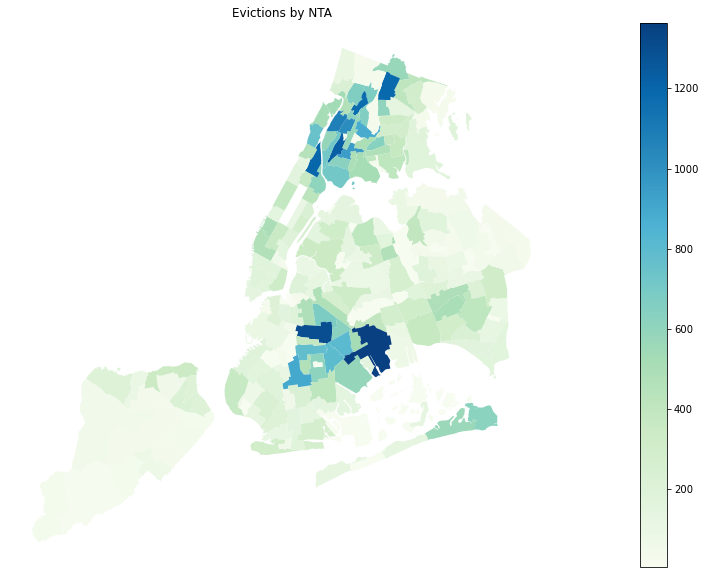

In [129]:
#visualised evictions by NTA 
nta_map.plot(column='evictions',figsize=(30, 10),cmap='GnBu', legend = 'on')
plt.axis('off')
plt.title('Evictions by NTA')
plt.show()

**7. Can you think of one additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood? Fetch data on that attribute and visualize it side-by-side with evictions or in the same map. Discuss your assumptions and findings as well as possible connections.**

I chose to look at housing maintenance code violations to see if there was any correlation between violations and evictions. The dataset was quite large so I decided to look at neighbourhoods located in Brooklyn. A violation is recorded when it breaks the New York City using Maintenance Code (HMC) or the New York State Multiple Dwelling Law (MDL). 

In [156]:
#downloaded housing maintenance code violations from NYC Open Data
hv = gpd.read_file("Housing_Maintenance_Code_Violations.csv")

In [157]:
hv.head()

,ViolationID,BuildingID,RegistrationID,BoroID,Borough,HouseNumber,LowHouseNumber,HighHouseNumber,StreetName,StreetCode,...,RentImpairing,Latitude,Longitude,CommunityBoard,CouncilDistrict,CensusTract,BIN,BBL,NTA,geometry
0,13557540,129532,305532,3,BROOKLYN,7212,7202,7212,4 AVENUE,5430,...,N,40.632700,-74.024312,10,43,66,3147358,3059080037,Bay Ridge,None
1,13563503,247122,338857,3,BROOKLYN,415,399,421,EAST 17 STREET,35580,...,N,40.640791,-73.962404,14,40,514,3118783,3051600048,Flatbush,None
2,13570867,327259,316801,3,BROOKLYN,305,295,305,LINDEN BOULEVARD,56230,...,N,40.652745,-73.948017,17,40,818,3108078,3048530086,Erasmus,None
3,13610332,809049,305557,3,BROOKLYN,1021,1021,1029,OCEAN AVENUE,67530,...,N,40.637386,-73.958590,14,40,51601,3120598,3052200079,Flatbush,None
4,13624031,292833,332256,3,BROOKLYN,607,607,607,FLATBUSH AVENUE,40930,...,N,40.658519,-73.960483,9,40,79801,3115285,3050370008,Prospect Lefferts Gardens-Wingate,None


In [158]:
#displays NTA names in Brooklyn
hv['NTA'].value_counts()

Flatbush                                            5137
Crown Heights North                                 4511
Prospect Lefferts Gardens-Wingate                   3551
Rugby-Remsen Village                                2402
East New York                                       2247
Stuyvesant Heights                                  2076
Bushwick North                                      2030
Brownsville                                         1976
Crown Heights South                                 1919
Bedford                                             1698
Erasmus                                             1630
Bushwick South                                      1614
Sunset Park West                                    1456
Ocean Hill                                          1406
East Flatbush-Farragut                              1275
East New York (Pennsylvania Ave)                    1223
Borough Park                                        1021
Cypress Hills-City Line        

In [159]:
#extracts data for number of violations per NTA (similar process as before)

hv_nta = hv['NTA'].value_counts()
hv_nta = hv_nta.reset_index()
hv_nta.columns = ['NTA','violations']

In [160]:
hv_nta.head()

,NTA,violations
0,Flatbush,5137
1,Crown Heights North,4511
2,Prospect Lefferts Gardens-Wingate,3551
3,Rugby-Remsen Village,2402
4,East New York,2247


In [148]:
#merging violations data with the NTA map 
nta_map = nta_map.merge(hv_nta, on='NTA')

In [153]:
nta_map

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,NTA,evictions,violations_x,violations_y
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",Borough Park,181,1021,1021
1,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16...",Homecrest,162,643,643
2,3,Brooklyn,047,BK44,Madison,26237.257858,2.737916e+07,"POLYGON ((1001593.410 160996.441, 1001382.708 ...",Madison,140,505,505
3,3,Brooklyn,047,BK41,Kensington-Ocean Parkway,20800.752358,1.589331e+07,"POLYGON ((992341.696 174770.869, 992361.536 17...",Kensington-Ocean Parkway,114,523,523
4,3,Brooklyn,047,BK95,Erasmus,18756.702033,1.452260e+07,"POLYGON ((998608.334 171942.436, 998339.702 17...",Erasmus,473,1630,1630
5,3,Brooklyn,047,BK69,Clinton Hill,23971.466027,2.052820e+07,"POLYGON ((997183.310 187255.551, 997207.887 18...",Clinton Hill,187,557,557
6,3,Brooklyn,047,BK43,Midwood,27996.590612,3.579957e+07,"POLYGON ((995312.051 168409.655, 995365.558 16...",Midwood,231,1006,1006
7,3,Brooklyn,047,BK26,Gravesend,39922.674156,3.134195e+07,"POLYGON ((993930.728 154632.708, 993887.012 15...",Gravesend,125,176,176
8,3,Brooklyn,047,BK29,Bensonhurst East,33903.245433,3.577795e+07,"POLYGON ((991253.136 162478.112, 991306.692 16...",Bensonhurst East,206,917,917
9,3,Brooklyn,047,BK72,Williamsburg,16874.433834,1.158999e+07,"POLYGON ((998047.210 196303.325, 998157.901 19...",Williamsburg,41,221,221


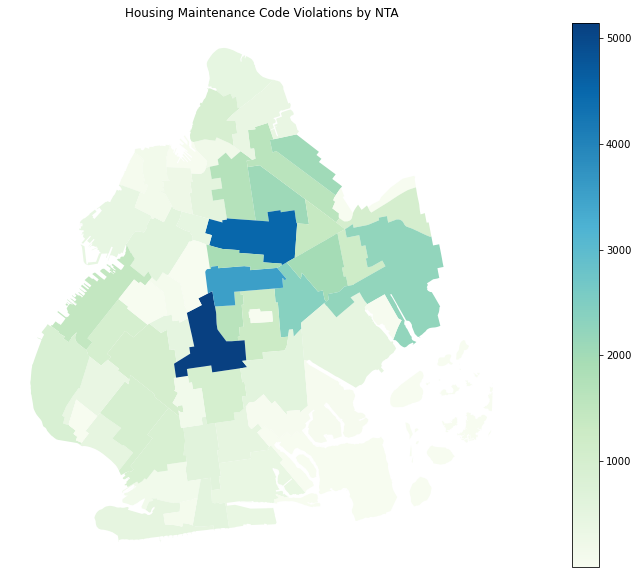

In [163]:
nta_map.plot(column='violations_x',figsize=(20, 10),cmap='GnBu', legend = 'on')
plt.axis('off')
plt.title('Housing Maintenance Code Violations by NTA')
plt.show()

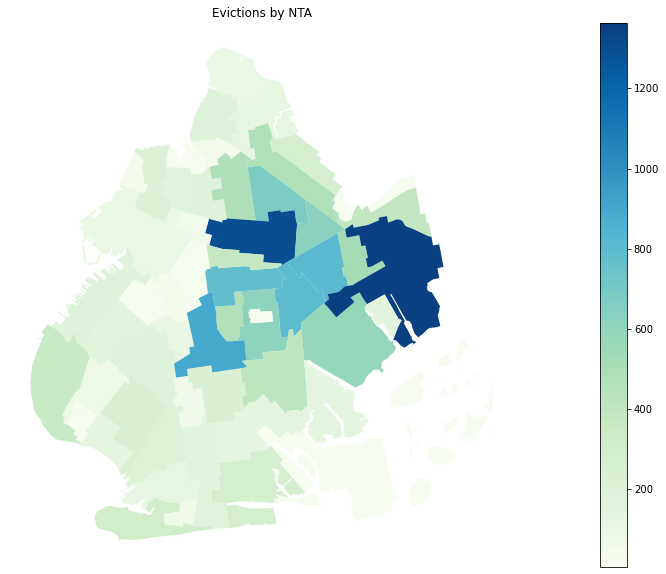

In [150]:
nta_map.plot(column='evictions',figsize=(30, 10),cmap='GnBu', legend = 'on')
plt.axis('off')
plt.title('Evictions by NTA')
plt.show()

Looking at the graphs above, there isn't a very strong correlation between the code violations and evictions, but there are higher violations in neighbourhoods facing high rates of eviction. Poorly maintained homes may not be fit to live in, and it is interesting to see that more people may be getting evicted where health and safety standards are not upheld. The conditions of the units may even be what leads to evictions. 